In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [37]:
test_scores = pd.read_csv("datasets/Admission and Test Scores/ADM_2015-2021_data.csv")
test_scores.head()

,unitid,admcon1,admcon2,admcon3,admcon4,admcon5,admcon6,admcon7,admcon8,admcon9,...,actcm25,actcm75,acten25,acten75,actmt25,actmt75,satwr25,satwr75,actwr25,year
0,100654,Required,Recommended,Required,Recommended,Neither required nor recommended,Recommended,Considered but not required,Required,Neither required nor recommended,...,15.0,20.0,14.0,20.0,15.0,NaN,NaN,NaN,NaN,2021
1,100663,Required,Neither required nor recommended,Required,Required,Neither required nor recommended,Neither required nor recommended,Considered but not required,Neither required nor recommended,Neither required nor recommended,...,23.0,30.0,23.0,33.0,21.0,NaN,NaN,NaN,NaN,2021
2,100706,Required,Recommended,Required,Neither required nor recommended,Neither required nor recommended,Recommended,Required,Required,Neither required nor recommended,...,24.0,31.0,24.0,32.0,23.0,NaN,NaN,NaN,NaN,2021
3,100724,Required,Neither required nor recommended,Recommended,Neither required nor recommended,Neither required nor recommended,Neither required nor recommended,Considered but not required,Required,Neither required nor recommended,...,15.0,20.0,12.0,22.0,15.0,NaN,NaN,NaN,NaN,2021
4,100751,Required,Recommended,Required,Required,Neither required nor recommended,Neither required nor recommended,Considered but not required,Required,Neither required nor recommended,...,21.0,31.0,21.0,33.0,19.0,NaN,NaN,NaN,NaN,2021


In [38]:
test_scores_copy = test_scores.copy()

In [39]:
test_scores_copy['ftm_ratio'] = test_scores_copy['enrlftm']/test_scores_copy['enrlft']
test_scores_copy['ftw_ratio'] = test_scores_copy['enrlftw']/test_scores_copy['enrlft']

In [40]:
annual_avg = test_scores_copy.groupby('year').mean()

/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_75702/3058517097.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_avg = test_scores_copy.groupby('year').mean()


In [45]:
public_fin = pd.read_csv("datasets/Institutional Finances/F_F1A_1415-1920_data.csv", low_memory=False)
public_fin = public_fin.groupby('unitid').mean().reset_index()
print(len(public_fin))
public_fin.head()

2010


/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_75702/3257254532.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  public_fin = public_fin.groupby('unitid').mean().reset_index()


,unitid,f1a01,f1a31,f1a04,f1a05,f1a06,f1a07,f1a08,f1a09,f1a10,...,f1h03b,f1h03c,f1h03d,f1n01,f1n02,f1n03,f1n04,f1n05,f1n06,year
0,100654,9.555195e+07,1.295820e+08,1.432761e+07,1.439096e+08,2.394616e+08,3.318814e+06,6.950189e+07,7.282070e+07,7.450086e+07,...,NaN,NaN,NaN,-17695164.0,1.820774e+08,19179411.0,-1.620711e+07,-7.882460e+07,84095687.0,1667.5
1,100663,1.594129e+09,1.635314e+09,1.429002e+09,3.064317e+09,4.658445e+09,3.595785e+07,4.813575e+08,5.173153e+08,9.623222e+08,...,-24394912.0,0.0,0.0,150898087.0,4.268321e+09,170508208.0,4.074294e+09,1.144734e+09,63098687.0,1667.5
2,100706,1.232633e+08,2.690003e+08,8.740337e+07,3.564037e+08,4.796670e+08,5.041705e+06,7.085105e+07,7.589276e+07,1.171604e+08,...,-2014207.0,1817344.0,-1816662.0,8333743.0,2.817352e+08,9970150.0,3.459439e+08,1.560548e+08,152896569.0,1667.5
3,100724,5.584644e+07,2.774644e+08,3.701944e+06,2.811663e+08,3.370128e+08,8.445083e+06,3.134017e+07,3.978525e+07,2.055497e+08,...,8305028.0,895886.0,7420313.0,16308737.0,1.522240e+08,16308737.0,9.457469e+07,0.000000e+00,203995814.0,1667.5
4,100733,3.777462e+06,1.259619e+07,1.138410e+07,2.398028e+07,2.775775e+07,0.000000e+00,3.576652e+06,3.576652e+06,0.000000e+00,...,NaN,NaN,NaN,89742.0,2.157520e+07,89742.0,4.506809e+06,7.545148e+06,0.0,1667.5


38619151.02892422


(array([1.0518e+04, 5.9600e+02, 2.1800e+02, 1.5700e+02, 1.2400e+02,
        6.5000e+01, 3.8000e+01, 1.5000e+01, 2.7000e+01, 2.4000e+01,
        1.1000e+01, 1.0000e+01, 8.0000e+00, 5.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 7.75290500e+07, 1.55058100e+08, 2.32587150e+08,
        3.10116200e+08, 3.87645250e+08, 4.65174300e+08, 5.42703350e+08,
        6.20232400e+08, 6.97761450e+08, 7.75290500e+08, 8.52819550e+08,
        9.30348600e+08, 1.00787765e+09, 1.08540670e+09, 1.16293575e+09,
        1.24046480e+09, 1.31799385e+09, 1.39552290e+09, 1.47305195e+09,
        1.55058100e+09]),
 <BarContainer object of 20 artists>)

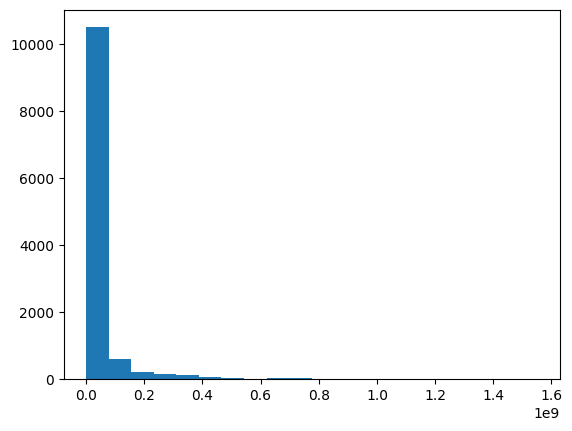

In [7]:
print(public_fin['f1b01'].mean())
plt.hist(public_fin['f1b01'], bins=20)

In [78]:
pnp_fin = pd.read_csv("datasets/Institutional Finances/F_F2_1415-1920_data.csv", low_memory=False)
pnp_fin = pnp_fin.groupby('unitid').mean().reset_index()
print(len(pnp_fin))
pnp_fin.head()

2068


/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_75702/295207239.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pnp_fin = pnp_fin.groupby('unitid').mean().reset_index()


,unitid,f2a01,f2a02,f2a03,f2a03a,f2a04,f2a05,f2a05a,f2a05b,f2a06,...,f2h03b,f2h03c,f2h03d,f2i01,f2i02,f2i03,f2i04,f2i05,f2i06,year
0,100690,8.760923e+06,1.307510e+07,2.535914e+06,1.508292e+06,9.889659e+06,6.495275e+05,1.748072e+05,4.747203e+05,1.053919e+07,...,13.0,0.0,0.0,2394351.0,9381760.0,2201197.0,11951175.0,14152372.0,0.0,1667.5
1,100937,5.235002e+07,1.722822e+08,5.624674e+07,3.738436e+07,5.059348e+07,6.544197e+07,4.314847e+07,2.229350e+07,1.160355e+08,...,1006739.0,5444864.0,-10889728.0,-6024836.0,39799160.0,-7539920.0,111529044.0,-4126246.0,31790881.0,1667.5
2,101073,1.404627e+06,1.362275e+07,4.539956e+06,0.000000e+00,6.643169e+06,2.439628e+06,1.393872e+06,1.045756e+06,9.082797e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1516.0
3,101189,2.053785e+07,9.023248e+07,4.341386e+07,3.305182e+07,2.887515e+07,1.794347e+07,1.271332e+07,5.230149e+06,4.681862e+07,...,333357.0,-1126002.0,0.0,-957785.0,42667202.0,-1371279.0,47914957.0,11573210.0,32760907.0,1667.5
4,101365,0.000000e+00,8.337251e+06,3.799330e+06,0.000000e+00,4.537922e+06,0.000000e+00,0.000000e+00,0.000000e+00,4.537922e+06,...,NaN,NaN,NaN,3106728.0,8852352.0,3106728.0,5717594.0,0.0,0.0,1768.5


In [47]:
pfp_fin = pd.read_csv("datasets/Institutional Finances/F_F3_1415-1920_data.csv", low_memory=False)
pfp_fin = pfp_fin.groupby('unitid').mean().reset_index()
print(len(pfp_fin))
pfp_fin.head()

3375


/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_75702/3593404382.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pfp_fin = pfp_fin.groupby('unitid').mean().reset_index()


,unitid,f3a01,f3a01a,f3a01b,f3a01c,f3a02,f3a02a,f3a03,f3a04,f3a05,...,f3c17,f3c171,f3c172,f3g01,f3g02,f3g03,f3g04,f3g05,f3g06,year
0,101116,4.925224e+06,0.0,1.495777e+06,22306.0,2.586224e+06,0.000000,2.339000e+06,4.925224e+06,0.0,...,0.0,0.0,0.0,-116216.0,6308243.0,1999615.0,2379172.0,646580.0,0.0,1667.5
1,101277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1667.5
2,101365,6.995714e+06,0.0,2.416994e+06,9577.0,2.093880e+06,0.000000,4.901834e+06,6.995714e+06,752129.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1465.5
3,101958,4.911928e+06,0.0,7.385000e+02,0.0,2.234425e+05,0.000000,4.688486e+06,4.911928e+06,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1465.5
4,102845,4.584560e+07,0.0,3.767555e+06,4515148.0,6.433169e+06,2630.333333,3.941243e+07,4.584560e+07,0.0,...,6772187.0,6772187.0,0.0,-167953.0,46512931.0,38988459.0,43746141.0,34000445.0,0.0,1667.5


In [48]:
finaid = pd.read_csv('datasets/Student Financial Aid/SFA_1415-2021_data.csv')
finaid = finaid.groupby('unitid').mean().reset_index()
print(len(finaid))
finaid.head()

7506


,unitid,scugrad,scugffn,scugffp,scfa2,scfa1n,scfa1p,scfa11n,scfa11p,scfa12n,...,npt411,npt421,npt431,npt441,npt451,npt410,npt420,npt430,npt440,year
0,100654,4873.428571,1426.285714,29.285714,4873.428571,1426.285714,29.285714,0.142857,0.0,818.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1718.0
1,100663,12891.857143,2019.857143,15.714286,12891.857143,2019.857143,15.714286,0.000000,0.0,1700.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1718.0
2,100690,316.000000,4.000000,1.285714,316.000000,4.000000,1.285714,NaN,NaN,NaN,...,12874.0,11133.5,NaN,NaN,NaN,8610.2,11053.5,NaN,NaN,1718.0
3,100706,6987.571429,1218.571429,17.428571,6987.571429,1218.571429,17.428571,0.000000,0.0,908.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1718.0
4,100724,4253.000000,1017.285714,24.142857,4253.000000,1017.285714,24.142857,0.000000,0.0,534.857143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1718.0


In [13]:
money_and_scores = pd.merge(finaid, test_scores_copy, on='unitid', how='outer')

In [14]:
money_and_scores['avg_award'] = (money_and_scores['gista0'] + money_and_scores['gista1'] + money_and_scores['gista2'])/3
money_and_scores['comp_sat75'] = money_and_scores['satmt75'] + money_and_scores['satvr75']
money_and_scores['comp_sat25'] = money_and_scores['satmt25'] + money_and_scores['satvr25']
money_and_scores = money_and_scores.dropna(axis='index', subset=['comp_sat75', 'comp_sat25'])
len(money_and_scores)

56576

Text(0, 0.5, 'ACT composite, 2015-2021')

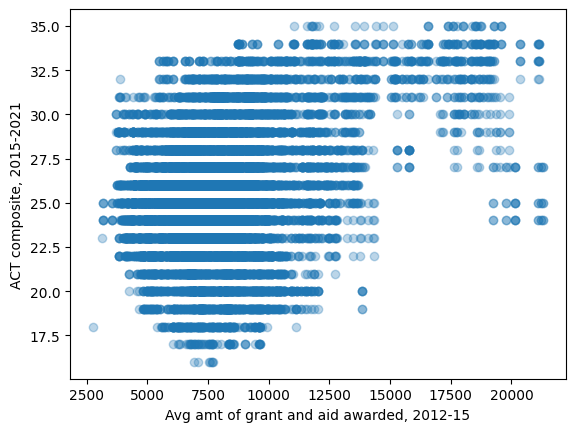

In [15]:
plt.scatter(money_and_scores['avg_award'], money_and_scores['actcm75'], alpha=0.3)
plt.xlabel('Avg amt of grant and aid awarded, 2012-15')
plt.ylabel('ACT composite, 2015-2021')

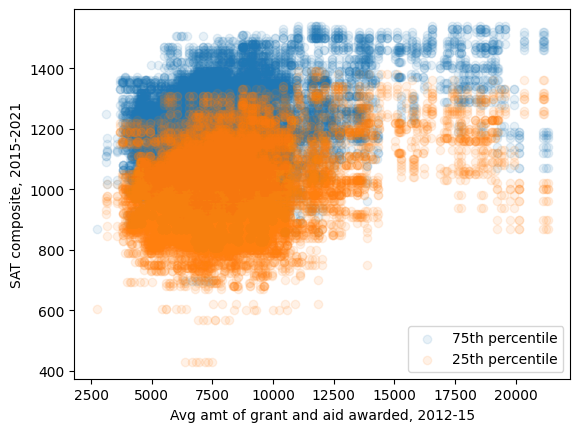

In [16]:
plt.scatter(money_and_scores['avg_award'], money_and_scores['comp_sat75'], alpha=0.1, label='75th percentile')
plt.scatter(money_and_scores['avg_award'], money_and_scores['comp_sat25'], alpha=0.1, label='25th percentile')
plt.xlabel('Avg amt of grant and aid awarded, 2012-15')
plt.ylabel('SAT composite, 2015-2021')
plt.legend()

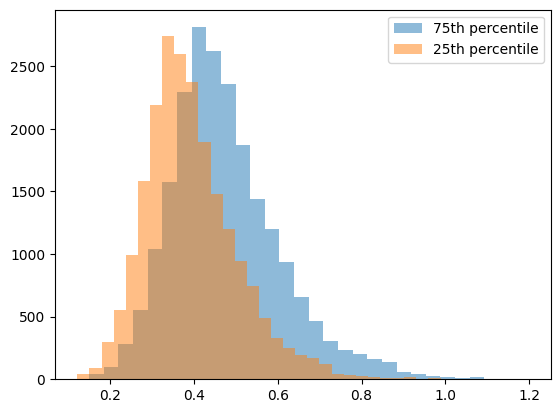

In [17]:
plt.hist(3*money_and_scores['comp_sat75']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='75th percentile')
plt.hist(3*money_and_scores['comp_sat25']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='25th percentile')
plt.legend()

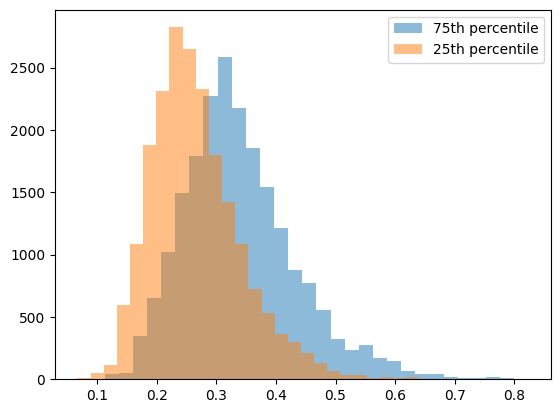

In [18]:
plt.hist(100*money_and_scores['actcm75']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='75th percentile')
plt.hist(100*money_and_scores['actcm25']/money_and_scores['avg_award'], bins=30, alpha=0.5, label='25th percentile')
plt.legend()

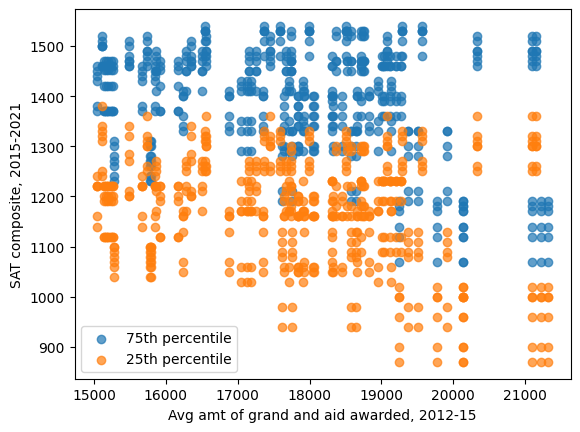

In [19]:
high_awarders = money_and_scores[money_and_scores['avg_award'] >= 15000]
plt.scatter(high_awarders['avg_award'], high_awarders['comp_sat75'], alpha=0.7, label='75th percentile')
plt.scatter(high_awarders['avg_award'], high_awarders['comp_sat25'], alpha=0.7, label='25th percentile')
plt.xlabel('Avg amt of grand and aid awarded, 2012-15')
plt.ylabel('SAT composite, 2015-2021')
plt.legend()

In [49]:
twelve_mo = pd.read_csv('datasets/12-Month Enrollment/EFFY_2015-2021_data.csv', low_memory=False)
twelve_mo = twelve_mo.groupby('unitid').mean().reset_index()
print(len(twelve_mo))
twelve_mo.head()

7880


/var/folders/9w/fw9jqmmd0_1746t9vj_vtsv40000gn/T/ipykernel_75702/3085548102.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  twelve_mo = twelve_mo.groupby('unitid').mean().reset_index()


,unitid,efytotlt,efytotlm,efytotlw,efyaiant,efyaianm,efyaianw,efyasiat,efyasiam,efyasiaw,...,efy2mort,efy2morm,efy2morw,efyunknt,efyunknm,efyunknw,efynralt,efynralm,efynralw,year
0,100654,2663.600000,1077.166667,1586.433333,6.233333,2.183333,4.050000,6.233333,3.083333,3.150000,...,31.966667,11.050000,20.916667,119.683333,41.800000,77.883333,27.850000,14.333333,13.516667,2019.616667
1,100663,8820.885246,3372.852459,5448.032787,21.409836,7.229508,14.180328,512.245902,218.344262,293.901639,...,337.409836,123.245902,214.163934,97.032787,43.049180,53.983607,337.983607,197.950820,140.032787,2019.639344
2,100690,366.132075,137.433962,228.698113,1.245283,0.622642,0.622642,2.000000,0.962264,1.037736,...,0.000000,0.000000,0.000000,37.132075,15.301887,21.830189,0.000000,0.000000,0.000000,2019.509434
3,100706,4254.688525,2404.327869,1850.360656,44.262295,23.901639,20.360656,157.229508,86.803279,70.426230,...,129.262295,65.885246,63.377049,174.737705,90.442623,84.295082,157.688525,106.327869,51.360656,2019.639344
4,100724,2156.627119,804.694915,1351.932203,3.508475,1.271186,2.237288,8.711864,4.288136,4.423729,...,25.440678,9.593220,15.847458,25.508475,10.101695,15.406780,32.898305,18.084746,14.813559,2019.610169


In [54]:
pub_dps = pd.merge(public_fin, twelve_mo, on='unitid', how='left')
pub_dps = pd.merge(pub_dps, finaid, on='unitid', how='left')
pub_dps['instruction_per_student'] = pub_dps['f1c011']/pub_dps['efytotlt']
pub_dps['research_per_student'] = pub_dps['f1c021']/pub_dps['efytotlt']
pub_dps['support_per_student'] = pub_dps['f1c051']/pub_dps['efytotlt']
pub_dps['services_per_student'] = pub_dps['f1c061']/pub_dps['efytotlt']
len(pub_dps)

2010

In [55]:
pub_dps['avg_net_price_2012-15'] = (pub_dps['npist0'] + pub_dps['npist1'] + pub_dps['npist2'])/3

In [23]:
# fig, ax = plt.subplots(2, 2)
# ax[0,0].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['instruction_per_student'], alpha=0.1)
# ax[0,0].set_xlabel('Average net price 2012-2015')
# ax[0,0].set_ylabel('Instruction ($) per student')

# ax[0,1].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['research_per_student'], alpha=0.1)
# ax[0,1].set_xlabel('Average net price 2012-2015')
# ax[0,1].set_ylabel('Research ($) per student')

# ax[1,0].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['support_per_student'], alpha=0.1)
# ax[1,0].set_xlabel('Average net price 2012-2015')
# ax[1,0].set_ylabel('Support ($) per student')

# ax[1,1].scatter(pub_dps['avg_net_price_2012-15'], pub_dps['services_per_student'], alpha=0.1)
# ax[1,1].set_xlabel('Average net price 2012-2015')
# ax[1,1].set_ylabel('Services ($) per student')

# plt.tight_layout()

In [83]:
pnp_dps = pd.merge(pnp_fin, twelve_mo, on='unitid', how='left')
pnp_dps = pd.merge(pnp_dps, finaid, on='unitid', how='left')
pnp_dps['instruction_per_student'] = pnp_dps['f2e011']/pnp_dps['efytotlt']
pnp_dps['research_per_student'] = pnp_dps['f2e021']/pnp_dps['efytotlt']
pnp_dps['support_per_student'] = pnp_dps['f2e041']/pnp_dps['efytotlt']
pnp_dps['services_per_student'] = pnp_dps['f2e051']/pnp_dps['efytotlt']

pnp_dps['avg_net_price_2012-15'] = (pnp_dps['npist0'] + pnp_dps['npist1'] + pnp_dps['npist2'])/3
len(pnp_dps)

2068

In [84]:
clusters = 7
X = pnp_dps[['instruction_per_student', 'research_per_student', 'support_per_student', 'services_per_student']]
X = X.dropna()
scaler = StandardScaler().fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

spending_gmm = GaussianMixture(n_components=clusters)
spending_gmm.fit(X_scaled)

# predict the cluster for each data point
y_cluster_gmm = spending_gmm.predict(X_scaled)
y_cluster_gmm

array([1, 1, 1, ..., 5, 3, 0])

In [25]:
# fig, ax = plt.subplots(2, 2)
# ax[0,0].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['instruction_per_student'], alpha=0.1)
# ax[0,0].set_xlabel('Average net price 2012-2015')
# ax[0,0].set_ylabel('Instruction ($) per student')

# ax[0,1].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['research_per_student'], alpha=0.1)
# ax[0,1].set_xlabel('Average net price 2012-2015')
# ax[0,1].set_ylabel('Research ($) per student')

# ax[1,0].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['support_per_student'], alpha=0.1)
# ax[1,0].set_xlabel('Average net price 2012-2015')
# ax[1,0].set_ylabel('Support ($) per student')

# ax[1,1].scatter(pnp_dps['avg_net_price_2012-15'], pnp_dps['services_per_student'], alpha=0.1)
# ax[1,1].set_xlabel('Average net price 2012-2015')
# ax[1,1].set_ylabel('Services ($) per student')

# plt.tight_layout()

In [66]:
finaid = pd.read_csv('datasets/Student Financial Aid/SFA_1415-2021_data.csv')
finaid = finaid.groupby('unitid').mean().reset_index()
fed_assist = finaid[['unitid', 'uagrntt', 'uagrnta', 'upgrntt', 'upgrnta', 'ufloant', 'ufloana', 'agrnt_t', 'agrnt_a']]
fed_assist = fed_assist.dropna()
fed_assist['pell/loans_total'] = fed_assist['upgrntt']/fed_assist['ufloant']
fed_assist['pell/loans_average'] = fed_assist['upgrnta']/fed_assist['ufloana']
fed_assist

,unitid,uagrntt,uagrnta,upgrntt,upgrnta,ufloant,ufloana,agrnt_t,agrnt_a,pell/loans_total,pell/loans_average
0,100654,3.979543e+07,9421.285714,1.735037e+07,5033.142857,2.749449e+07,7581.714286,1.180797e+07,9441.571429,0.631049,0.663853
1,100663,6.972894e+07,8304.857143,2.252380e+07,4994.428571,4.600713e+07,7243.714286,1.712199e+07,9477.714286,0.489572,0.689484
2,100690,1.234940e+06,4493.000000,8.173551e+05,3546.000000,2.247791e+06,8496.571429,2.684400e+04,6027.000000,0.363626,0.417345
3,100706,4.235716e+07,8837.714286,8.084301e+06,4334.714286,1.927970e+07,6789.857143,1.208038e+07,10943.714286,0.419317,0.638410
4,100724,3.232794e+07,8284.571429,1.440571e+07,4549.428571,3.153627e+07,9402.000000,7.806731e+06,8731.285714,0.456798,0.483879
...,...,...,...,...,...,...,...,...,...,...,...
7500,497222,1.515160e+05,4095.000000,9.918500e+04,4959.000000,1.529390e+05,6118.000000,8.021500e+04,5730.000000,0.648527,0.810559
7501,497268,4.473600e+04,7456.000000,3.739100e+04,6232.000000,1.651590e+05,11797.000000,1.624000e+03,1624.000000,0.226394,0.528270
7502,497277,1.353095e+06,3628.000000,1.238451e+06,3384.000000,1.773318e+06,5038.000000,4.311140e+05,3449.000000,0.698381,0.671695
7504,497310,2.171620e+05,4097.000000,2.171620e+05,4097.000000,7.468700e+05,8787.000000,1.689090e+05,4223.000000,0.290763,0.466257


In [62]:
price_labels = pub_dps[['unitid', 'avg_net_price_2012-15']]
price_labels = price_labels.drop_duplicates()
len(price_labels)

2010

In [63]:
fed_assist = pd.merge(price_labels, fed_assist, on='unitid', how='left')

X = fed_assist[['uagrntt', 'uagrnta', 'upgrntt', 'upgrnta', 'ufloant', 'ufloana', 'agrnt_t', 'agrnt_a', 'pell/loans_total', 'pell/loans_average']]
y = fed_assist['avg_net_price_2012-15']

# print(len(fed_assist))

offset = int(X.shape[0] * 0.85)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

NameError: name 'LazyRegressor' is not defined